## **Terryanda Naufaldo Arhaby**

## **1103213107**

## **Machine Learning Week 7 TugasXGBoost 2**

In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import DMatrix, train
from xgboost import plot_tree
from xgboost import plot_importance

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the second dataset with correct delimiter
file_path = '/content/drive/MyDrive/Dataset/tugasxgboost2.csv'
df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows to confirm proper loading
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# Define predictors and target variable (adjust to column names in the dataset)
predictors = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]
X = df[predictors]

# Set the target variable
y = df['quality']

# Display the first few rows of predictors and target
X.head(), y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0                 186.0   0.9956  3.19       0.40   
 
    alcohol  
 0      8.8  
 1      9.5  
 2     10.1  
 3      9.9  
 4

In [7]:
# Split the data into training and validation sets (e.g., 80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the sizes of the training and validation sets
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3918, 11), (980, 11), (3918,), (980,))

In [9]:
# Define the model with a random seed for reproducibility
model = XGBRegressor(random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
predictions = model.predict(X_valid)

# Calculate the mean absolute error
mae = mean_absolute_error(y_valid, predictions)
print("Mean Absolute Error on validation set for the new dataset:", mae)

Mean Absolute Error on validation set for the new dataset: 0.5087531615276726


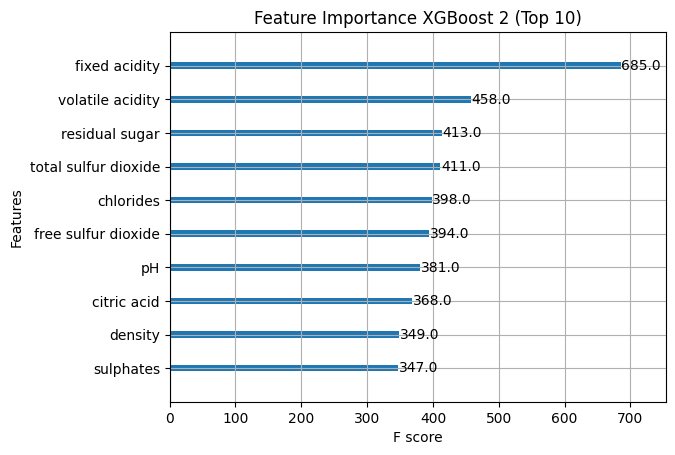

In [10]:
# Plot feature importance for XGBoost 2
plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance XGBoost 2 (Top 10)")
plt.show()

<Figure size 2000x1000 with 0 Axes>

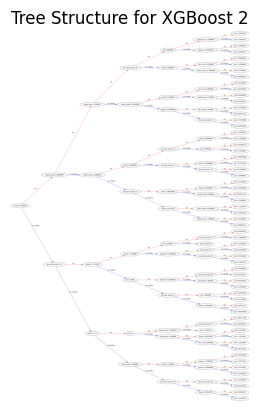

In [11]:
# Plot the first tree in the model for XGBoost 2
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0, rankdir='LR')  # Change num_trees as needed
plt.title("Tree Structure for XGBoost 2")
plt.show()


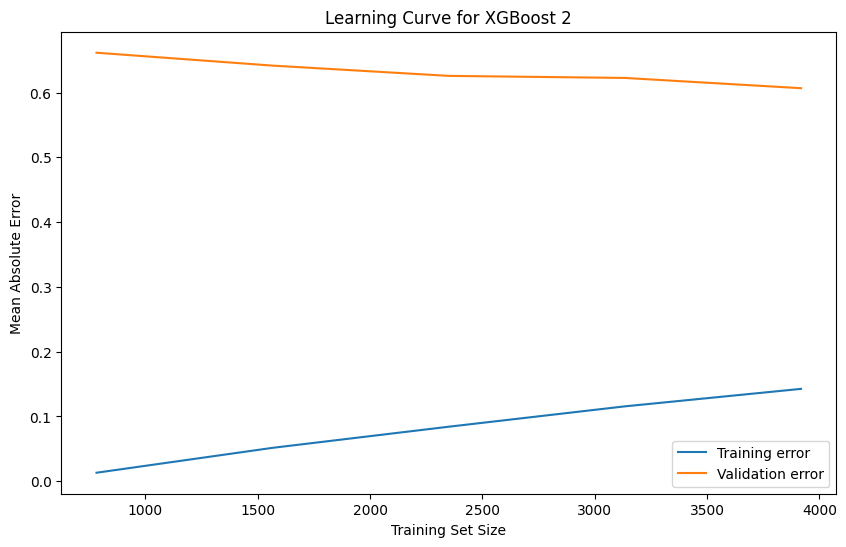

In [12]:
# Calculate the learning curve for XGBoost 2
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=[0.2, 0.4, 0.6, 0.8, 1.0], cv=5, scoring='neg_mean_absolute_error'
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean_2 = -train_scores.mean(axis=1)
valid_scores_mean_2 = -valid_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean_2, label="Training error")
plt.plot(train_sizes, valid_scores_mean_2, label="Validation error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Learning Curve for XGBoost 2")
plt.legend()
plt.show()


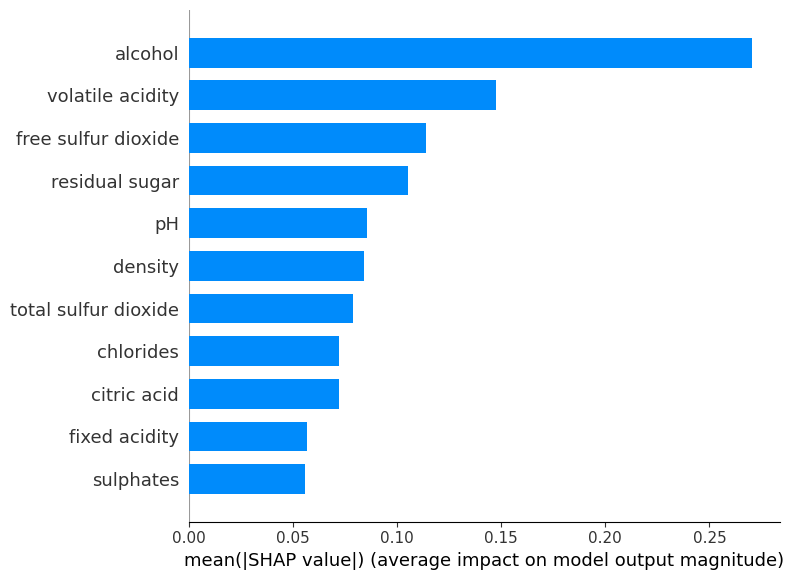

In [13]:
# Create SHAP explainer for XGBoost 2
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_valid)

# Plot summary SHAP values
shap.summary_plot(shap_values, X_valid, plot_type="bar")

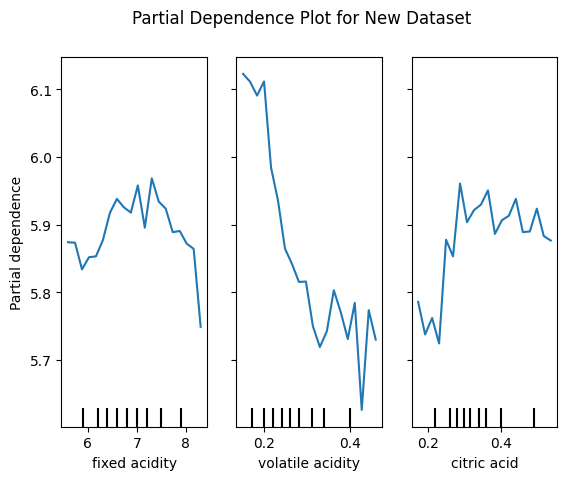

In [15]:
# Define features to plot partial dependence for XGBoost 2
features = ['fixed acidity', 'volatile acidity', 'citric acid']

# Create partial dependence plot for XGBoost 2
PartialDependenceDisplay.from_estimator(model, X_train, features, grid_resolution=20)
plt.suptitle("Partial Dependence Plot for New Dataset")
plt.show()